In [10]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
last updated: 2020-03-31 

numpy 1.18.1
pandas 1.0.3
matplotlib 3.2.1
sklearn 0.22.2.post1


In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

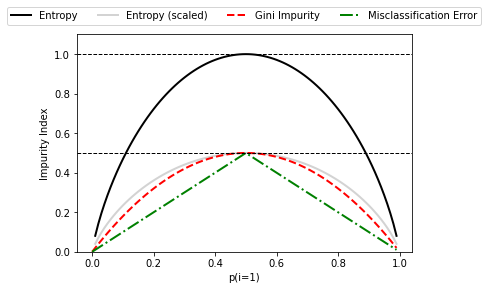

In [13]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [14]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 꽃잎 길이와 꽃잎 너비를 특성행렬 X에 저장
# 이에 상승하는 꽃 품종에 해당하는 클래스 레이블을 벡터 y에 할당
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

[[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]
 [5.6 2.4]
 [6.6 2.1]
 [1.2 0.2]
 [5.8 1.6]
 [4.6 1.3]
 [3.3 1. ]
 [3.9 1.4]
 [1.3 0.2]
 [4.7 1.2]
 [4.  1.3]
 [5.1 1.9]
 [1.9 0.2]
 [3.5 1. ]
 [3.9 1.2]
 [1.6 0.2]
 [4.8 1.8]
 [6.9 2.3]
 [4.5 1.5]
 [4.5 1.3]
 [3.8 1.1]
 [5.6 2.4]
 [4.7 1.4]
 [5.6 1.4]
 [5.8 2.2]
 [5.1 2.4]
 [4.1 1.3]
 [1.5 0.4]
 [6.7 2.2]
 [5.  1.9]
 [4.8 1.8]
 [5.6 2.1]
 [4.2 1.5]
 [6.7 2. ]
 [5.5 1.8]
 [1.6 0.2]
 [4.9 1.8]
 [1.4 0.2]
 [5.1 1.5]
 [1.9 0.4]
 [1.  0.2]
 [4.9 1.5]
 [1.5 0.2]
 [1.1 0.1]
 [5.5 1.8]
 [4.7 1.5]
 [1.7 0.3]
 [3.5 1. ]
 [4.1 1. ]
 [1.5 0.2]
 [1.5 0.2]
 [1.5 0.2]
 [3.7 1. ]
 [6.1 2.5]
 [1.3 0.3]
 [4.9 1.5]
 [1.3 0.2]
 [4.5 1.6]
 [6.  1.8]
 [1.6 0.2]
 [1.4 0.2]
 [4.4 1.2]
 [5.1 1.9]
 [3.6 1.3]
 [4.1 1.3]
 [4.8 1.8]
 [6.1 2.3]
 [4.5 1.5]
 [4.5 1.5]
 [5.4 2.1]
 [5.6 2.2]
 [4.6 1.4]
 [1.5 0.4]
 [1.7 0.5]
 [6.1 1.9]
 [5.1 1.6]
 [6.4 2. ]
 [5.  1.5]
 [1.5 0.2]
 [4.2 1.3]
 [5.1 2. ]
 [6.  2.5]
 [1.5 0.3]
 [1.4 0.2]
 [5.6 1.8]
 [1.4 0.3]
 [5.9 2.3]

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


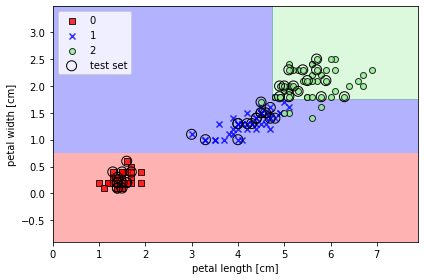

In [15]:
from sklearn.tree import DecisionTreeClassifier
# help(DecisionTreeClassifier)
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=3,
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

print(X_combined)

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

### 3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결하기

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


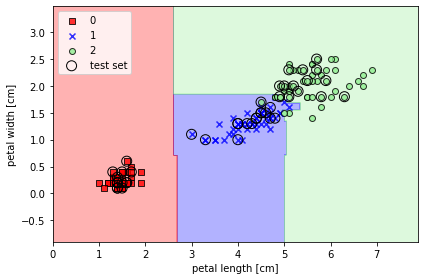

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### K-최근접 이웃: 게으른 학습 알고리즘

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


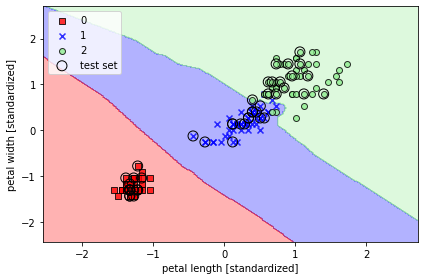

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 꽃잎 길이와 꽃잎 너비를 특성행렬 X에 저장
# 이에 상승하는 꽃 품종에 해당하는 클래스 레이블을 벡터 y에 할당
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()